In [2]:
# Here we import everything we need for the project

%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from PIL import Image
from array import *
from random import shuffle

print(tf.__version__)

1.15.0-rc3


In [3]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

3


In [0]:
# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(28, 28)


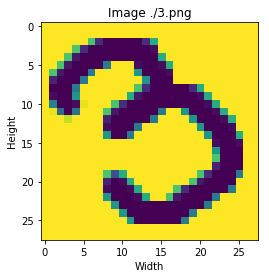

In [5]:
plot_image(imagepaths[2]) #We plot the first image from our imagepaths array

In [37]:
Names = [['/content','train'], ['/content','test']]

for filename in imagepaths:
  data_image = array('B')
  data_label = array('B')
  
  label = int(filename.split('/')[1].split('.')[0])
  
  Im = Image.open(filename)

  pixel = Im.load()

  width, height = Im.size

  for x in range(0,width):
    for y in range(0,height):
      data_image = np.concatenate((data_image,pixel[y,x]))

  print(data_image)
  data_label.append(label)
  print(data_label)
  
  hexval = "{0:#0{1}x}".format(len(imagepaths),6)
  header = []
  header.extend([0,0,8,1,0,0])
  header.append(int('0x'+hexval[2:][:2],16))
  header.append(int('0x'+hexval[2:][2:],16))
	
  data_label = np.concatenate((header, data_label))

	# additional header for images array
	
  if max([width,height]) <= 256:
    header.extend([0,0,0,width,0,0,0,height])
  else:
    raise ValueError('Image exceeds maximum size: 256x256 pixels');

  header[3] = 3 # Changing MSB for image data (0x00000803)
	
  data_image = np.concatenate((header, data_image))

  print(data_image)
  print(data_label)
  output_file = open(name[1]+'-images-idx3-ubyte', 'wb')
  data_image.tofile(output_file)
  output_file.close()

  output_file = open(name[1]+'-labels-idx1-ubyte', 'wb')
  data_label.tofile(output_file)
  output_file.close()

# gzip resulting files

for name in Names:
	os.system('gzip '+name[1]+'-images-idx3-ubyte')
	os.system('gzip '+name[1]+'-labels-idx1-ubyte')


[255 255 255 ... 255 255 255]
array('B', [8])
[  0   0   8 ... 255 255 255]
[0 0 8 1 0 0 0 3 8]
[255 255 255 ... 255 255 255]
array('B', [6])
[  0   0   8 ... 255 255 255]
[0 0 8 1 0 0 0 3 6]
[255 255 255 ... 255 255 255]
array('B', [3])
[  0   0   8 ... 255 255 255]
[0 0 8 1 0 0 0 3 3]
